**Parsisiųsti countries.csv failą iš https://www.csdojo.io/data**
**Susikurti iš jo duomenų paketą (Pandas DataFrame)**

In [1]:
from pandas import pandas as pd

df = pd.read_csv('countries.csv')

df

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


**Atspausdinti tik metų stulpelį**

In [2]:
df.year

0       1952
1       1957
2       1962
3       1967
4       1972
        ... 
1699    1987
1700    1992
1701    1997
1702    2002
1703    2007
Name: year, Length: 1704, dtype: int64

In [3]:
df['year']

0       1952
1       1957
2       1962
3       1967
4       1972
        ... 
1699    1987
1700    1992
1701    1997
1702    2002
1703    2007
Name: year, Length: 1704, dtype: int64

**Atspausdinti norimos šalies didžiausius/mažiausius/vidutinius gyventojų kiekius**

In [5]:
df[df["country"] == "Australia"]['population'].min()

8691212

In [6]:
df[df["country"] == "Australia"]['population'].max()

20434176

In [7]:
df[df["country"] == "Australia"]['population'].mean()

14649312.5

**Atspausdinti bendrą lentelės ataskaitą**

In [8]:
df.describe()

,year,population
count,1704.00000,1.704000e+03
mean,1979.50000,2.960121e+07
std,17.26533,1.061579e+08
min,1952.00000,6.001100e+04
25%,1965.75000,2.793664e+06
50%,1979.50000,7.023596e+06
75%,1993.25000,1.958522e+07
max,2007.00000,1.318683e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     1704 non-null   object
 1   year        1704 non-null   int64 
 2   population  1704 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 40.1+ KB


**Išsaugokite sukurtą DataFrame į duomenų bazę.**

In [10]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///salys.db') 

df.to_sql("Šalys", engine)

**Grafike atvaizduoti kelių skirtingų šalių populiacijos pokytį per metus**
**Padaryti, kad grafikas turėtų pavadinimą, būtų įvardintos x/y ašys bei kreivės.**

In [11]:
df

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


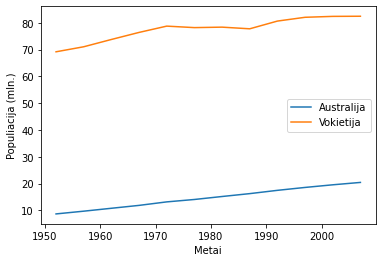

In [12]:
from matplotlib import pyplot as plt

australia = df[df.country == 'Australia']
germany = df[df.country == 'Germany']

plt.plot(australia.year, australia.population / 10**6)
plt.plot(germany.year, germany.population / 10**6)
plt.legend(['Australija', 'Vokietija'])
plt.xlabel('Metai')
plt.ylabel('Populiacija (mln.)')
plt.show()

**2 UŽDUOTIS. Į Pandas DataFrame įdėkite duomenų bazę darbuotojai3.db ir savo nuožiūra išbandykite šioje paskaitoje pateiktas Pandas galimybes.**

In [13]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///darbuotojai3.db')
df = pd.read_sql_table("DARBUOTOJAS", engine)

df

,ID,VARDAS,PAVARDĖ,ASMENS_KODAS,PAREIGOS,DIRBA_NUO,BAZINIS_ATLYGINIMAS,PRIEDAI,SKYRIUS_ID,PROJEKTAS_ID
0,1,Martynas,Jačas,38009200000,Programuotojas,2011-02-02,2000.0,0.0,2.0,1.0
1,2,Goda,Jablonkskaitė,48602110000,Vadybininkas,2009-04-06,1800.0,700.0,3.0,2.0
2,3,Mantas,Gabalis,39008200000,Testuotojas,2012-12-15,1400.0,200.0,2.0,1.0
3,4,Arnoldas,Lukas,39402130000,Programuotojas,2002-02-30,2200.0,0.0,2.0,2.0
4,5,Maja,Jačiulytė,49803120000,Buhalterė,2015-11-30,1400.0,200.0,1.0,3.0
5,6,Mikas,Taileikis,50004230000,Programuotojas,2008-05-25,1650.0,100.0,2.0,4.0
6,7,Giedrius,Vaicekauskas,38605300000,Vadovas,2010-07-30,3500.0,1000.0,4.0,5.0
7,8,Romas,Babavičius,38609190000,Finansininkas,2011-09-30,2000.0,0.0,1.0,5.0
8,9,Milda,Babavičiūtė,48609190000,Testuotojas,2010-07-15,1300.0,200.0,2.0,2.0
9,10,Domas,Sabaliauskas,39903130000,Testuotojas,2016-08-15,1200.0,200.0,2.0,2.0


In [14]:
df.BAZINIS_ATLYGINIMAS.max()

5000.0

In [15]:
df.BAZINIS_ATLYGINIMAS.min()

1000.0

In [16]:
df.BAZINIS_ATLYGINIMAS.mean()

1902.7777777777778

In [17]:
df.BAZINIS_ATLYGINIMAS.sum()

34250.0

In [18]:
df.BAZINIS_ATLYGINIMAS.count()

18

In [19]:
df.shape

(20, 10)

In [20]:
df.head()

,ID,VARDAS,PAVARDĖ,ASMENS_KODAS,PAREIGOS,DIRBA_NUO,BAZINIS_ATLYGINIMAS,PRIEDAI,SKYRIUS_ID,PROJEKTAS_ID
0,1,Martynas,Jačas,38009200000,Programuotojas,2011-02-02,2000.0,0.0,2.0,1.0
1,2,Goda,Jablonkskaitė,48602110000,Vadybininkas,2009-04-06,1800.0,700.0,3.0,2.0
2,3,Mantas,Gabalis,39008200000,Testuotojas,2012-12-15,1400.0,200.0,2.0,1.0
3,4,Arnoldas,Lukas,39402130000,Programuotojas,2002-02-30,2200.0,0.0,2.0,2.0
4,5,Maja,Jačiulytė,49803120000,Buhalterė,2015-11-30,1400.0,200.0,1.0,3.0


In [21]:
df.tail(2)

,ID,VARDAS,PAVARDĖ,ASMENS_KODAS,PAREIGOS,DIRBA_NUO,BAZINIS_ATLYGINIMAS,PRIEDAI,SKYRIUS_ID,PROJEKTAS_ID
18,19,Arnas,Lukša,38807200000,None,2009-11-15,NaN,NaN,NaN,5.0
19,20,Urtė,Lukaitė,60202020000,None,2005-02-02,NaN,NaN,NaN,NaN


In [22]:
df[10:15]

,ID,VARDAS,PAVARDĖ,ASMENS_KODAS,PAREIGOS,DIRBA_NUO,BAZINIS_ATLYGINIMAS,PRIEDAI,SKYRIUS_ID,PROJEKTAS_ID
10,11,Dainius,Sabutis,39806230000,Vadybininkas,2018-12-12,1000.0,1000.0,3.0,2.0
11,12,Tautvydas,Ubartas,38005300000,Programuotojas,2017-06-06,1750.0,0.0,2.0,3.0
12,13,Henrikas,Sabutis,39402020000,Vadybininkas,2018-02-02,1100.0,700.0,3.0,3.0
13,14,Arnoldas,Jačas,38506300000,Programuotojas,2014-03-03,1950.0,200.0,2.0,2.0
14,15,Jaunius,Šindeikis,38803120000,Vadovas,2014-06-08,5000.0,0.0,2.0,1.0


In [23]:
df[15:]

,ID,VARDAS,PAVARDĖ,ASMENS_KODAS,PAREIGOS,DIRBA_NUO,BAZINIS_ATLYGINIMAS,PRIEDAI,SKYRIUS_ID,PROJEKTAS_ID
15,16,Rimantas,Kundrotas,38711120000,Programuotojas,2017-02-02,2000.0,0.0,2.0,3.0
16,17,Egidijus,Antanaitis,39002130000,Testuotojas,2011-02-03,1500.0,300.0,2.0,4.0
17,18,Lukas,Antanaitis,38809130000,Testuotojas,2011-12-02,1500.0,300.0,2.0,4.0
18,19,Arnas,Lukša,38807200000,None,2009-11-15,NaN,NaN,NaN,5.0
19,20,Urtė,Lukaitė,60202020000,None,2005-02-02,NaN,NaN,NaN,NaN


In [24]:
df.iloc[2]

ID                               3
VARDAS                      Mantas
PAVARDĖ                    Gabalis
ASMENS_KODAS           39008200000
PAREIGOS               Testuotojas
DIRBA_NUO               2012-12-15
BAZINIS_ATLYGINIMAS           1400
PRIEDAI                        200
SKYRIUS_ID                       2
PROJEKTAS_ID                     1
Name: 2, dtype: object

In [25]:
df.iloc[2:5]

,ID,VARDAS,PAVARDĖ,ASMENS_KODAS,PAREIGOS,DIRBA_NUO,BAZINIS_ATLYGINIMAS,PRIEDAI,SKYRIUS_ID,PROJEKTAS_ID
2,3,Mantas,Gabalis,39008200000,Testuotojas,2012-12-15,1400.0,200.0,2.0,1.0
3,4,Arnoldas,Lukas,39402130000,Programuotojas,2002-02-30,2200.0,0.0,2.0,2.0
4,5,Maja,Jačiulytė,49803120000,Buhalterė,2015-11-30,1400.0,200.0,1.0,3.0


In [26]:
df.iloc[2, 3]

'39008200000'

In [29]:
df.columns

Index(['ID', 'VARDAS', 'PAVARDĖ', 'ASMENS_KODAS', 'PAREIGOS', 'DIRBA_NUO',
       'BAZINIS_ATLYGINIMAS', 'PRIEDAI', 'SKYRIUS_ID', 'PROJEKTAS_ID'],
      dtype='object')

In [32]:
df[['VARDAS', 'PAVARDĖ']]

,VARDAS,PAVARDĖ
0,Martynas,Jačas
1,Goda,Jablonkskaitė
2,Mantas,Gabalis
3,Arnoldas,Lukas
4,Maja,Jačiulytė
5,Mikas,Taileikis
6,Giedrius,Vaicekauskas
7,Romas,Babavičius
8,Milda,Babavičiūtė
9,Domas,Sabaliauskas


In [33]:
df.BAZINIS_ATLYGINIMAS[5:10]

5    1650.0
6    3500.0
7    2000.0
8    1300.0
9    1200.0
Name: BAZINIS_ATLYGINIMAS, dtype: float64

In [35]:
for index, row in df.iterrows():
  print(index, row['VARDAS'])

0 Martynas
1 Goda
2 Mantas
3 Arnoldas
4 Maja
5 Mikas
6 Giedrius
7 Romas
8 Milda
9 Domas
10 Dainius
11 Tautvydas
12 Henrikas
13 Arnoldas
14 Jaunius
15 Rimantas
16 Egidijus
17 Lukas
18 Arnas
19 Urtė


In [36]:
df.loc[df['BAZINIS_ATLYGINIMAS'] > 2000]

,ID,VARDAS,PAVARDĖ,ASMENS_KODAS,PAREIGOS,DIRBA_NUO,BAZINIS_ATLYGINIMAS,PRIEDAI,SKYRIUS_ID,PROJEKTAS_ID
3,4,Arnoldas,Lukas,39402130000,Programuotojas,2002-02-30,2200.0,0.0,2.0,2.0
6,7,Giedrius,Vaicekauskas,38605300000,Vadovas,2010-07-30,3500.0,1000.0,4.0,5.0
14,15,Jaunius,Šindeikis,38803120000,Vadovas,2014-06-08,5000.0,0.0,2.0,1.0


In [39]:
df.sort_values('PRIEDAI', ascending=False)

,ID,VARDAS,PAVARDĖ,ASMENS_KODAS,PAREIGOS,DIRBA_NUO,BAZINIS_ATLYGINIMAS,PRIEDAI,SKYRIUS_ID,PROJEKTAS_ID
10,11,Dainius,Sabutis,39806230000,Vadybininkas,2018-12-12,1000.0,1000.0,3.0,2.0
6,7,Giedrius,Vaicekauskas,38605300000,Vadovas,2010-07-30,3500.0,1000.0,4.0,5.0
12,13,Henrikas,Sabutis,39402020000,Vadybininkas,2018-02-02,1100.0,700.0,3.0,3.0
1,2,Goda,Jablonkskaitė,48602110000,Vadybininkas,2009-04-06,1800.0,700.0,3.0,2.0
17,18,Lukas,Antanaitis,38809130000,Testuotojas,2011-12-02,1500.0,300.0,2.0,4.0
16,17,Egidijus,Antanaitis,39002130000,Testuotojas,2011-02-03,1500.0,300.0,2.0,4.0
8,9,Milda,Babavičiūtė,48609190000,Testuotojas,2010-07-15,1300.0,200.0,2.0,2.0
13,14,Arnoldas,Jačas,38506300000,Programuotojas,2014-03-03,1950.0,200.0,2.0,2.0
9,10,Domas,Sabaliauskas,39903130000,Testuotojas,2016-08-15,1200.0,200.0,2.0,2.0
4,5,Maja,Jačiulytė,49803120000,Buhalterė,2015-11-30,1400.0,200.0,1.0,3.0


In [40]:
df.loc[df['PAVARDĖ'].str.contains('Antan')]

,ID,VARDAS,PAVARDĖ,ASMENS_KODAS,PAREIGOS,DIRBA_NUO,BAZINIS_ATLYGINIMAS,PRIEDAI,SKYRIUS_ID,PROJEKTAS_ID
16,17,Egidijus,Antanaitis,39002130000,Testuotojas,2011-02-03,1500.0,300.0,2.0,4.0
17,18,Lukas,Antanaitis,38809130000,Testuotojas,2011-12-02,1500.0,300.0,2.0,4.0


In [42]:
df

,ID,VARDAS,PAVARDĖ,ASMENS_KODAS,PAREIGOS,DIRBA_NUO,BAZINIS_ATLYGINIMAS,PRIEDAI,SKYRIUS_ID,PROJEKTAS_ID
0,1,Martynas,Jačas,38009200000,Programuotojas,2011-02-02,2000.0,0.0,2.0,1.0
1,2,Goda,Jablonkskaitė,48602110000,Vadybininkas,2009-04-06,1800.0,700.0,3.0,2.0
2,3,Mantas,Gabalis,39008200000,Testuotojas,2012-12-15,1400.0,200.0,2.0,1.0
3,4,Arnoldas,Lukas,39402130000,Programuotojas,2002-02-30,2200.0,0.0,2.0,2.0
4,5,Maja,Jačiulytė,49803120000,Buhalterė,2015-11-30,1400.0,200.0,1.0,3.0
5,6,Mikas,Taileikis,50004230000,Programuotojas,2008-05-25,1650.0,100.0,2.0,4.0
6,7,Giedrius,Vaicekauskas,38605300000,Vadovas,2010-07-30,3500.0,1000.0,4.0,5.0
7,8,Romas,Babavičius,38609190000,Finansininkas,2011-09-30,2000.0,0.0,1.0,5.0
8,9,Milda,Babavičiūtė,48609190000,Testuotojas,2010-07-15,1300.0,200.0,2.0,2.0
9,10,Domas,Sabaliauskas,39903130000,Testuotojas,2016-08-15,1200.0,200.0,2.0,2.0


In [41]:
df.groupby(['PAREIGOS']).mean().sort_values('BAZINIS_ATLYGINIMAS',
ascending=False)

,ID,BAZINIS_ATLYGINIMAS,PRIEDAI,SKYRIUS_ID,PROJEKTAS_ID
PAREIGOS,,,,,
Vadovas,11.000000,4250.0,500.0,3.0,3.000000
Finansininkas,8.000000,2000.0,0.0,1.0,5.000000
Programuotojas,8.833333,1925.0,50.0,2.0,2.500000
Buhalterė,5.000000,1400.0,200.0,1.0,3.000000
Testuotojas,11.400000,1380.0,240.0,2.0,2.600000
Vadybininkas,8.666667,1300.0,800.0,3.0,2.333333


In [44]:
df.groupby(['SKYRIUS_ID']).count()['ID']

SKYRIUS_ID
1.0     2
2.0    12
3.0     3
4.0     1
Name: ID, dtype: int64

In [45]:
df.describe()

,ID,BAZINIS_ATLYGINIMAS,PRIEDAI,SKYRIUS_ID,PROJEKTAS_ID
count,20.00000,18.000000,18.000000,18.000000,19.000000
mean,10.50000,1902.777778,283.333333,2.166667,2.842105
std,5.91608,955.090421,336.504523,0.707107,1.344254
min,1.00000,1000.000000,0.000000,1.000000,1.000000
25%,5.75000,1400.000000,0.000000,2.000000,2.000000
50%,10.50000,1700.000000,200.000000,2.000000,3.000000
75%,15.25000,2000.000000,300.000000,2.000000,4.000000
max,20.00000,5000.000000,1000.000000,4.000000,5.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   20 non-null     int64  
 1   VARDAS               20 non-null     object 
 2   PAVARDĖ              20 non-null     object 
 3   ASMENS_KODAS         20 non-null     object 
 4   PAREIGOS             18 non-null     object 
 5   DIRBA_NUO            20 non-null     object 
 6   BAZINIS_ATLYGINIMAS  18 non-null     float64
 7   PRIEDAI              18 non-null     float64
 8   SKYRIUS_ID           18 non-null     float64
 9   PROJEKTAS_ID         19 non-null     float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.7+ KB


In [47]:
df.to_excel('darbuotojai.xlsx', index=False)

In [48]:
df.to_csv('modifikuotas.txt', index=False, sep='\t')

**Darbuotojų grafikai:**

In [49]:
df

,ID,VARDAS,PAVARDĖ,ASMENS_KODAS,PAREIGOS,DIRBA_NUO,BAZINIS_ATLYGINIMAS,PRIEDAI,SKYRIUS_ID,PROJEKTAS_ID
0,1,Martynas,Jačas,38009200000,Programuotojas,2011-02-02,2000.0,0.0,2.0,1.0
1,2,Goda,Jablonkskaitė,48602110000,Vadybininkas,2009-04-06,1800.0,700.0,3.0,2.0
2,3,Mantas,Gabalis,39008200000,Testuotojas,2012-12-15,1400.0,200.0,2.0,1.0
3,4,Arnoldas,Lukas,39402130000,Programuotojas,2002-02-30,2200.0,0.0,2.0,2.0
4,5,Maja,Jačiulytė,49803120000,Buhalterė,2015-11-30,1400.0,200.0,1.0,3.0
5,6,Mikas,Taileikis,50004230000,Programuotojas,2008-05-25,1650.0,100.0,2.0,4.0
6,7,Giedrius,Vaicekauskas,38605300000,Vadovas,2010-07-30,3500.0,1000.0,4.0,5.0
7,8,Romas,Babavičius,38609190000,Finansininkas,2011-09-30,2000.0,0.0,1.0,5.0
8,9,Milda,Babavičiūtė,48609190000,Testuotojas,2010-07-15,1300.0,200.0,2.0,2.0
9,10,Domas,Sabaliauskas,39903130000,Testuotojas,2016-08-15,1200.0,200.0,2.0,2.0


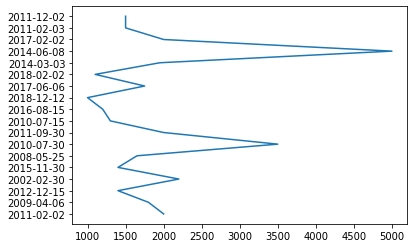

In [50]:
from matplotlib import pyplot as plt

metai = df['BAZINIS_ATLYGINIMAS']
temperatura = df['DIRBA_NUO']

plt.plot(metai, temperatura)
plt.show()